In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_10458/3130060226.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('BostonHousing.csv')

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
for col in df.columns:
    print(type(df[col][6]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


<AxesSubplot:>

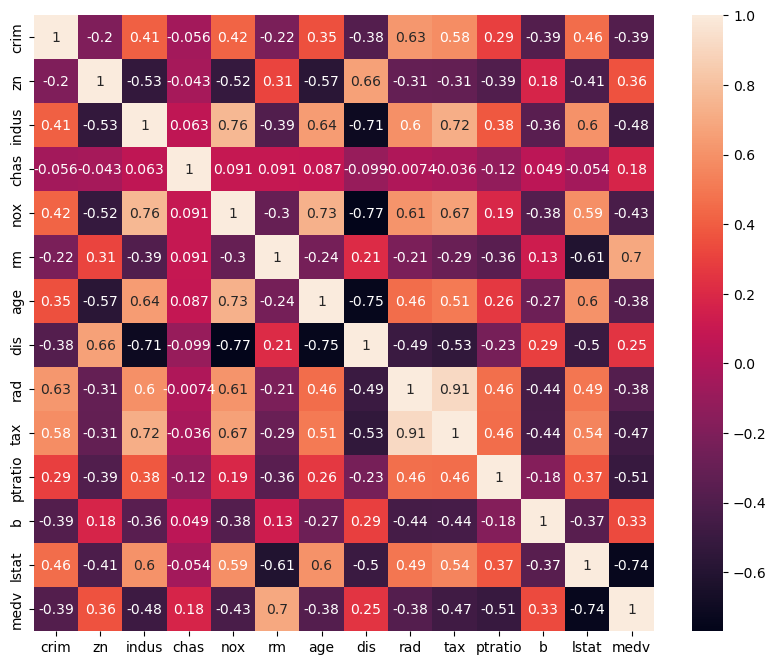

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(),annot=True )

## From the above heatmap we can figure out that the rm has strong positive correlation with medv(the avg price)

In [8]:
df[['rm','medv' ]].describe()

,rm,medv
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


## From the above we can say that there is no need of normalization

<AxesSubplot:xlabel='medv'>

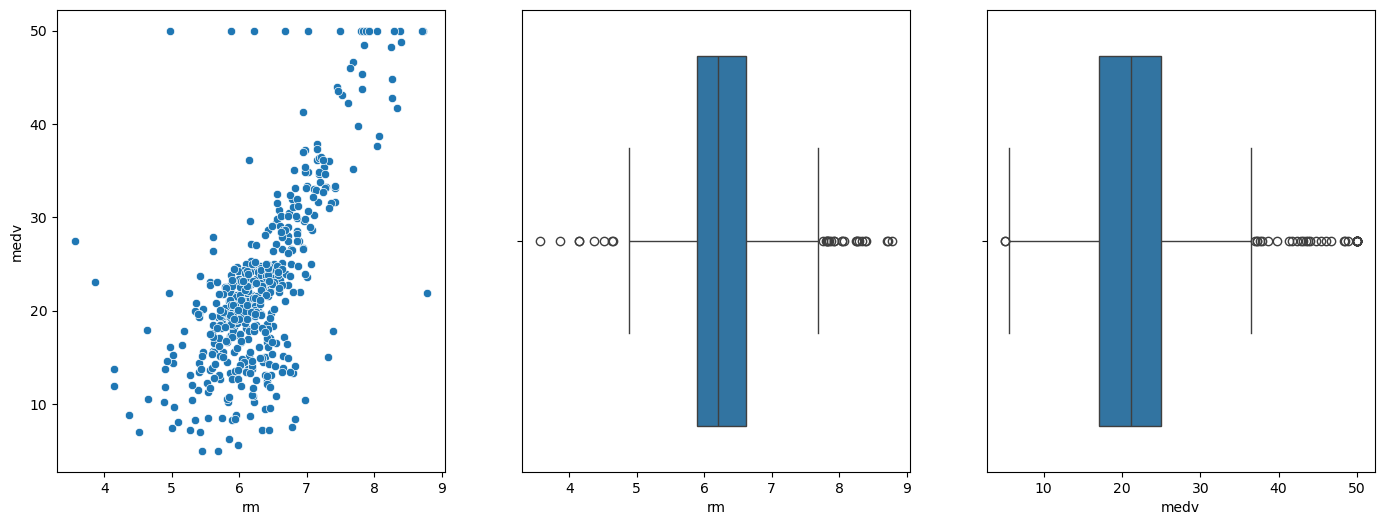

In [9]:
fig, axes = plt.subplots(1,3,figsize=(17,6))
sns.scatterplot(data = df, x = 'rm', y = 'medv', ax=axes[0])
sns.boxplot(data = df, x= 'rm',ax=axes[1])
sns.boxplot(data = df, x= 'medv',ax=axes[2])

In [19]:
def remove_outliers(df, col_name):
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col_name] >lower_bound) & (df[col_name] < upper_bound)][col_name]

clipped_rm = remove_outliers(df,'rm')
clipped_medv = remove_outliers(df,'medv')
# Not preferred to remove outliers

In [20]:
print(clipped_medv.describe())
clipped_rm.describe()

count    466.000000
mean      20.719099
std        6.451416
min        5.600000
25%       16.500000
50%       20.600000
75%       24.075000
max       36.500000
Name: medv, dtype: float64


count    476.000000
mean       6.233212
std        0.533578
min        4.880000
25%        5.886500
50%        6.183500
75%        6.553000
max        7.691000
Name: rm, dtype: float64

<AxesSubplot:xlabel='medv'>

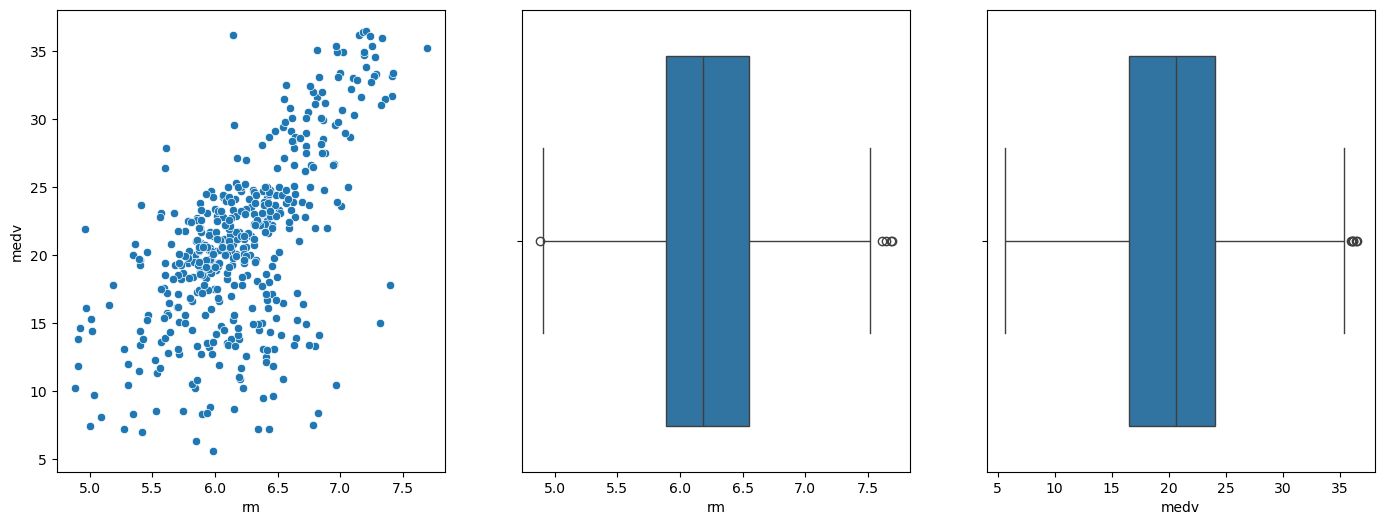

In [21]:
fig, axes = plt.subplots(1,3,figsize=(17,6))
sns.scatterplot(x = clipped_rm, y = clipped_medv, ax=axes[0])
sns.boxplot( x= clipped_rm,ax=axes[1])
sns.boxplot( x= clipped_medv,ax=axes[2])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()




In [51]:
rm_arr = np.array(df['rm'].values)
medv_arr = np.array(df['medv'].values)
rm_arr = np.reshape(rm_arr, newshape=(-1,1))
medv_arr = np.reshape(medv_arr, newshape=(-1,1))

In [67]:

x_train,x_test,y_train,y_test = train_test_split(rm_arr, medv_arr, train_size=0.9, random_state=0)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [68]:
from sklearn.metrics import mean_squared_error

acc = mean_squared_error(y_pred=predictions, y_true=y_test)
acc

67.948411197987

In [74]:
mean_val = y_train.mean()
mean_sq_err = 0
for i in y_test:
    mean_sq_err += (mean_val-i)**2
print(mean_sq_err)

[4460.77786982]
